*__Alejandro Gonzalez Garcia__
<br>
Date: Jan. 26, 2021
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 7: Bose-Einstein distributions</font></center>

## <font color=#46769B>Introduction:</font>

We consider a probability distribution function for photon energies emitted by a black body, described by the Bose-Einstein distribution.
This PDF, whose CDF cannot be computed in terms of elementary functions, presents an opportunity to explore __importance sampling__.


Our goals for this notebook are:
- Practice finding your own proposal distribution for importance sampling.
- Use imporance sampling to describe a target distribution.

Required reading:
- *Lesson 4: Importance Sampling*

## <font color=#46769B>Bose-Einstein distribution:</font>

Black-body radiation is the characteristic electromagnetic radiation that is emitted from an object with temperature $T$. 
(You are no doubt aware of the fact that hot objects can radiate infrared and visible light. But if you are not familiar with this topic - and its context in the history of important discoveries in physics - you may want to [watch a video](https://www.youtube.com/watch?v=7BXvc9W97iU).)

For an ideal black body with temperature $T$, photons are emitted with a continuous spectrum of energies that follows a characteristic distribution, known as a *Bose-Einstein distribution*.<font color=red>$^1$</font>
The Bose-Einstein distribution predicts that the probability of measuring a photon with energy in the range $[E,E+dE]$ is $P(E) \, dE$, where the PDF is
$$P(E) = \left\{ \begin{array}{cc} \frac{A E^2}{(k_B T)^3} \left(e^{\frac{E}{k_B T}} -1 \right)^{-1} & {\rm for} \; E \ge 0 \\
0 & {\rm otherwise} \end{array} \right. \, ,$$
where $k_B$ is Boltzmann's constant and $A = 0.415954$ is a numerical constant fixed by requiring the total probability for a photon to have *any* energy is 100\%, i.e.,  $\int_{0}^\infty dE \, P(E) = 1$. 

### <font color=#46769B>Footnotes:</font>

<font color=red>$^1$</font> While the functional form of the black-body spectrum was first discovered by Planck, it was later derived by [Bose](https://physicstoday.scitation.org/do/10.1063/PT.5.031387/full/) in his pioneering work on quantum statistics. 
Bose sent his paper on the subject to Einstein, along with this beautifully aspirational accompanying [letter](https://www.reddit.com/r/Physics/comments/inocza/bose_letter_to_einstein_which_accompanied_his/). 
Einstein, recognizing its importance, translated Bose's work into German and facilitated its publication.
The word *boson* is named in honor of Bose.





## <font color=#46769B>Goal</font>

The task for this Exercise is to use __importance sampling__ to study the probability distribution function $P(E)$ given above.

## <font color=#46769B>Part (a)</font>

Choose a proposal distribution $Q(E)$ that you will sample from. You can choose anything you like, but ensure it has the following qualities:
1. You are able to sample from it (using the inverse CDF method that you used in Exercises 4-6).
2. $Q(E)$ cannot be zero for a value of $E$ where $P(E)$ is nonzero.
3. As $E \to \infty$, $Q(E)$ should not go to zero *faster* than $P(E)$ goes to zero. That is, $$\lim_{E \to \infty} Q(E)/P(E) > 0 \, .$$

Make a plot using `matplotlib.pyplot` that shows both your proposal distribution $Q(x)$ and your target distribution $P(E)$. It should be clear that all three aforementioned properties are satisfied.

Note: for simplicity, please set $k_B T = 1$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


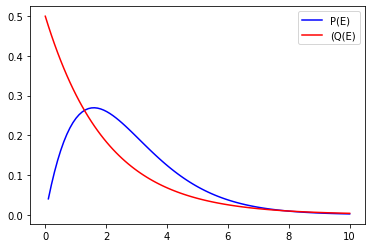

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 0.415954
E = np.linspace(0, 10, 100)

def P(E):
    return (A * E**2) / (np.exp(E) - 1)


#  our Q(E) has to satisfy the required characteristics, meaning
#  that a function of the form y = a * e**(-a*x) would be best
a = 1/2  # this value seems to fit best

def Q(E):
    return a * np.exp(-a*E)

plt.plot(E, P(E), label='P(E)', color='blue')
plt.plot(E, Q(E), label='(Q(E)', color='red')
plt.legend()
plt.show()

## <font color=#46769B>Part (b)</font>

Follow these steps to make a histogram of energies $E$ that will reproduce the target distribution $P(E)$:
- Write a function `sample_E_from_Q(num)` that returns `num` random samples for $E$ that are drawn from the proposal distribution $Q(E)$.
- Write another function `compute_weights(E_samples)` that takes as input your samples for $E$ and returns the corresponding weights.

For $N = 10^6$, make the following plots:
- Make an *unweighted* histogram of your samples for $E$ and compare to your proposal distribution $Q(E)$.
- Make *weighted* histogram of your samples for $E$ and compare to the target distribution $P(E)$.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


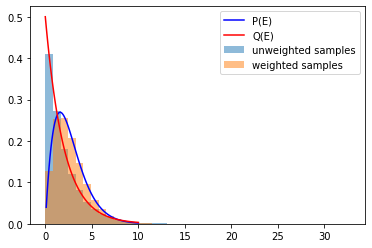

In [2]:
N = 10**6

def sample_E_from_Q(num):
    r = np.random.rand(num)
    E_samples = -2 * np.log(1-r)
    return E_samples


E_samples = sample_E_from_Q(N)

def compute_weights(E_samples):
    w = P(E_samples) / Q(E_samples)
    return w


w = compute_weights(E_samples)

#  plot unweighted histogram
plt.hist(E_samples, bins=40, alpha=0.5, density=True, label='unweighted samples')

#  plot weighted histogram
plt.hist(E_samples, bins=40, alpha=0.5, weights=w, density=True, label='weighted samples')

plt.plot(E, P(E), label='P(E)', color='blue')
plt.plot(E, Q(E), label='Q(E)', color='red')
plt.legend()
plt.show()


## <font color=#46769B>Part (c)</font>

The task here is to compute the mean energy $\mu$ and standard deviation $\sigma$ for $P(E)$.
With importance sampling, you will have to compute these quantities as weighted sums, as described in the Lesson 4.

Write *your own code* to calculate the mean $\langle E \rangle$ and standard deviation $\Delta E$ for the target distribution $P(x)$ using $N=10^6$ samples for $E$ from the proposal distribution. Just to make things difficult for you, you may *not* use any `numpy` functions except for `numpy.sqrt`.

Note: I provided my own versions of these functions in Lesson 4. Feel free to use these to check your results (and see if your code runs faster or slower than mine).

What are your values for $\langle E \rangle$ and $\Delta E$?



In [3]:
#  calculate mean
def mean(num):
    E_weight = E_samples * w

    sum_E_weight = sum(E_weight)

    mean = sum_E_weight / num
    return mean


print('the mean is', mean(N))

#  calculate standard deviation

def std(num):
    E_samples_squared = []
    for i in E_samples:
        E_samples_squared.append(i ** 2)

    weights_E_samples_squared = w * E_samples_squared

    sum_weights = sum(weights_E_samples_squared)

    mean_of_square = sum_weights / num


    std = np.sqrt(mean_of_square)
    return std


print('the std is', std(N))


the mean is 2.705300577935878
the std is 3.220899222398743
